# Pohyb v centrálním poli Slunce
V předchozí lekci jsme řešili pohyby (vrhy) těles v homogenním gravitačním poli, tedy v blízkosti země, kde je ve všech místech stejné $g$. Úlohu jsme si ale v případě vrhů komplikovali odporem vzduchu. Nyní budeme řešit pohyb těles (třeba planet) okolo Slunce. Budeme tedy zřejmě bez odporu vzduchu, ale zase velikost i směr gravitační síly na těleso budou záviset na jeho poloze. Počátek soustavy souřadné položíme do Slunce a polohu planety popíšeme polohovým vektorem $\vec{r}=(x,y)$ a její rychlost vektorem $\vec{v}=(v_x,v_y)$. Budeme řešit jen pohyb v rovině, tedy 2D případ. Hmotnost planety značme $m$, hmotnost Slunce $M$.
$$ \vec{F} = G\frac{mM}{|r|^2}\frac{\vec{r}}{|r|}$$
V tomto vztahu vás možná mate člen $\\vec{r}/|r|$, protože vám připadá, že tam nepatří. Tento člen je ale pouze takzvaný jednotkový vektor (má velikost 1) ve směru ke Slunci. Gravitační zákon je pak ve vektorové podobě, kdy je v rovnici obsažen i směr gravitační síly.
Přístup k napsání kódu pro numerickou simulaci pohybu planety bude v jádru úplně stejný jako pro šikmý vrh z minulé lekce. Budeme počítat nové hodnoty polohy a rychlosti v čase $t+\Delta t$ na základě původní polohy $\vec{r}$, rychlosti $v$ a zrychlení $\vec{a}$.

\begin{eqnarray}
\vec{r}' = \vec{r} + \vec{v}\Delta(t) \\
\vec{v}' = \vec{v} + \vec{a}\Delta(t) \\
\vec{a}' = F(\vec{r}')/m
\end{eqnarray}

Toto je návod, jak postupně vypočítat vývoj polohy a rychlosti v čase pomocí malých časových posunů, např. dříve uvedenou Newtonovou metodou. Také jsme si ale ukazovali chytřejší způsob integrace pohybových rovnic, a sice pomocí funkce \code{odeint}. V takovém případě potřebujeme vyjádřit hodnoty derivací $\vec{r}$ a $\vec{v}$:

\begin{eqnarray}
\frac{\mathrm{d}\vec{r}}{\mathrm{d} t} = \vec{v} \\
\frac{\mathrm{d}\vec{v}}{\mathrm{d} t} = \vec{a}
\end{eqnarray}

přičemž podle předchozího
$$ \vec{a} = G\frac{M}{|r|^3}\vec{r}$$


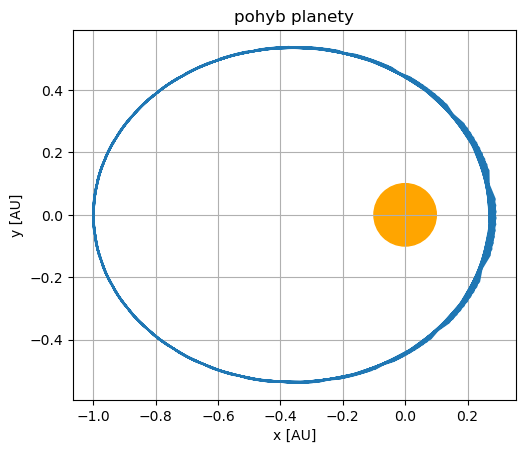

In [3]:
import numpy as np
import matplotlib.pyplot as plt
m = 6e24 # hmotnost planety v kg
M = 2e30 # hmotnost Slunce
G = 6.67e-11 # gravitacni konstanta v zakladnich jednotkach
AU = 1.5e11 # astronomicka jednotka v m
r0 = np.array([-1*AU,0*AU]) # pocatecni vektor polohy
v0 = np.array([0,2e4]) # pocatecni vektor rychlosti v m/s
# Zakladni jednotkou casu je sekunda, ale nadefinujeme si i nejake jeji nasobky, jako den a rok
yr = 3600*24*365
day = 3600*24
# vynulujeme stopky a nastavime nas prirustek casu
# zde jsou pohyby zajimave v casove skale mnoha roku, takze si nemuzeme dovoilit postupovat jen po setine sekundy jako minule.
# Vezmeme casovy krok treba jednu hodinu, tedy 3600 s.
t = 0
dt = 3600
# inicializace
r = r0
v = v0
data = []
# smycka
while t<5*yr:
    a = -r*G*M/(r.dot(r)**(3/2))
    v = v + a*dt
    r = r + v*dt
    t = t + dt
    # pridat do 'tabulky' dalsi radek obsahujici aktualni udaje t,x,y,vx,vy,ax,ay
    data.append([t,r[0],r[1],v[0],v[1],a[0],a[1]])
# konverze tabulky do numpy array a rozdeleni na sloupce. Ve sloupcich mame casovou radu poloh, rychlosti a zrychleni
tt,xx,yy,vvx,vvy,aax,aay = np.hsplit(np.array(data),7)
# vypocitana poloha v case pomoci numericke simulace
# vyber jen polohy kazdych 7 dnu
sli = slice(0,-1,int(7*day/dt))
xx1 = xx[sli]
yy1 = yy[sli]

plt.plot(xx1/AU,yy1/AU,'-',markersize=2,label='')
plt.axis('scaled')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.grid()
plt.title('pohyb planety')
sun = plt.Circle((0, 0), 0.1, color='orange')
plt.gca().add_patch(sun)
plt.show()

In [ ]:
# Toto nefunguje
from tkinter import *
import time

gui = Tk()
gui.geometry("800x600")
gui.title("Pi Animation")
canvas = Canvas(gui, width=800,height=600,bg='white')
canvas.pack()

planet = canvas.create_oval(5,5,20,20, fill='red')
for x,y in zip(xx1,yy1):
    canvas.move(planet,int(400+50*x/AU),int(300+50*y/AU))
    gui.update()
    time.sleep(.01)

gui.mainloop()